# PyTorch and Neural Networks

[YuJa video](https://uci.yuja.com/V/Video?v=4372302&node=14708610&a=6152974&autoplay=1) from lecture

In [4]:
from tqdm.std import tqdm, trange
from tqdm import notebook
notebook.tqdm = tqdm
notebook.trange = trange

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

The first four lines
```
from tqdm.std import tqdm, trange
from tqdm import notebook
notebook.tqdm = tqdm
notebook.trange = trange
```
are an ad hoc suggestion I read on a [Deepnote forum](https://community.deepnote.com/c/bugs/tqdm-call-causes-importerror) to help prevent a minor error (the error is just because of a progress bar, nothing important).  Don't worry about them.

In [5]:
# Load the data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

9913344it [00:00, 12277516.74it/s]                                              


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



29696it [00:00, 25916365.29it/s]                                                

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



1649664it [00:00, 14674633.28it/s]                                              

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


5120it [00:00, 14480671.94it/s]                                                 
/Users/christopherdavis/miniconda3/envs/math11/lib/python3.9/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


YouTube video on *Neural Networks* from 3Blue1Brown.  Recommended clips:
* 2:42-5:30
* 8:40-12:40

<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
training_data.data[13]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  38, 222, 225,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 147, 234, 252, 176,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,
         197, 253, 252, 208,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 178,
         252, 253, 117,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Using the default color map.

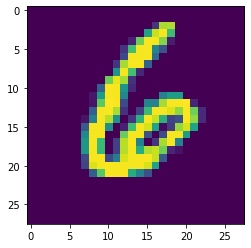

In [9]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13])

Using the `binary` color map.

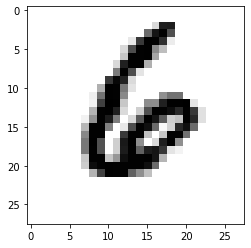

In [8]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13],cmap='binary')

Switching to the reversed color map, by appending `_r` to the end of the `cmap` name.

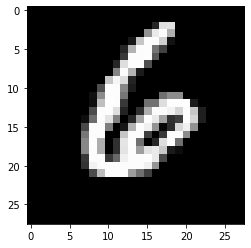

In [6]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13],cmap='binary_r')

That should correspond to the number 6.

In [ ]:
training_data.targets[13]

tensor(6)

To convert a length-one PyTorch tensor to a single number, we use `.item()`.

In [ ]:
training_data.targets[13].item()

6

In the 3Blue1Brown video, the grid of image pixels gets "flattened" out into a length 784 vector.  PyTorch has a standard way of doing this, using `nn.Flatten()`.

In [10]:
flatten = nn.Flatten()

In [11]:
flatten(training_data.data[:13])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [12]:
training_data.data[:13].shape

torch.Size([13, 28, 28])

In [13]:
flatten(training_data.data[:13]).shape

torch.Size([13, 784])

PyTorch uses many elements of *Object Oriented* programming.  In the following, we are defining a new type of object called `ThreeBlue`.  You don't need to understand all of the details; we will try to make clear what you should understand and what is less important for us, for example, in the class Learning Objectives.

The name `__init__` defined below begins and ends with two underscores.  These sorts of methods are called *dunder methods* for double underscore.  They lie in the background of many Python operations.  For example, when you add two objects together, that is often (always?) secretly using the `__add__` dunder method.  The `__init__` method is a method that is called when a new object is created of this class.

The class `ThreeBlue` below is the beginning of a tiny neural network.

In [14]:
class ThreeBlue(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

    def forward(self,x):
        y = self.flatten(x)
        return y

In [15]:
mon = ThreeBlue()

I don't totally understand what the `__main__` means in the following; the important part is that the object `mon` we have instantiated is of type `ThreeBlue`.

In [17]:
type(mon)

__main__.ThreeBlue

We defined a `flatten` attribute in the `__init__` method above, so that is why `mon` has a `flatten` attribute.  We can use it just like the `flatten` above.

In [18]:
mon.flatten

Flatten(start_dim=1, end_dim=-1)

In [19]:
mon.flatten(training_data.data[:13])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

Here is a slightly bigger neural network.

In [21]:
class ThreeBlue(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(784,10)
        )

    def forward(self,x):
        y = self.flatten(x)
        z = self.layers(y)
        return z

In [22]:
mon = ThreeBlue()

The entries in `training_data.data` are integers between 0 and 255.  We want floats instead, and numbers between 0 and 1 is more natural anyway, so we can fix the following error by dividing by 255.  This can also be accomplished using the `ToTensor` function that is written above (we will see it later).

In [24]:
mon(training_data.data)

RuntimeError: expected scalar type Float but found Byte

In [ ]:
training_data.data.numpy().max()

255

In [ ]:
training_data.data.max()

tensor(255, dtype=torch.uint8)

In [25]:
mon(training_data.data/255)

tensor([[ 0.1105,  0.1300,  0.3704,  ...,  0.0590,  0.0513,  0.2594],
        [-0.0808, -0.0764,  0.1113,  ...,  0.0635, -0.0391,  0.2883],
        [-0.2125, -0.0836,  0.0596,  ..., -0.0140, -0.1898,  0.3666],
        ...,
        [-0.1745,  0.2551,  0.0882,  ...,  0.0980, -0.1026,  0.1571],
        [ 0.0205,  0.1019,  0.1136,  ..., -0.1841,  0.0719,  0.1039],
        [-0.0740,  0.1893,  0.2209,  ...,  0.0394,  0.1120,  0.1661]],
       grad_fn=<AddmmBackward0>)

Notice that we never explicitly call the `forward` method of `mon`.  PyTorch is calling this for us in the background; we should not call it directly.

In [ ]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
mon(training_data.data/255).shape

torch.Size([60000, 10])

Think of a neural network as a function.  For each input data point for MNIST handwritten digits, we want 10 outputs.  After rescaling, we can think of these 10 outputs as probabilities for each possible true value of the digit.